<a href="https://colab.research.google.com/github/Kalyanreddy3334/Image-Classification/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ipython-autotime
%load_ext autotime

time: 4.88 ms (started: 2022-03-23 04:51:11 +00:00)


In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

datadir = '/content/drive/MyDrive/Machine  Learning /ML/images'
Categories = ['sun flower','pen','shoe']   
for i in Categories:
  class_num = Categories.index(i)   # label encoding the images
  path = os.path.join(datadir,i)    # create path to use all the images
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    # print(img_array.shape)
    #plt.imshow(img_array)
    img_resized = resize(img_array,(250,250,3))   # normalizes the value from 0 to 1
    flat_data.append(img_resized.flatten())   # flattening the data
    images.append(img_resized)
    target.append(class_num)

    
flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

In [ ]:
flat_data

array([[0.11438726, 0.23159216, 0.02409412, ..., 0.02689901, 0.08963137,
        0.        ],
       [0.38453333, 0.53355294, 0.34139608, ..., 0.00392157, 0.2041381 ,
        0.02745098],
       [0.184     , 0.26635294, 0.11341176, ..., 0.54300392, 0.53516078,
        0.47246275],
       ...,
       [0.99215686, 0.99215686, 0.99215686, ..., 0.99951373, 0.99951373,
        0.99951373],
       [0.98823529, 0.98823529, 0.98823529, ..., 0.98823529, 0.98823529,
        0.98823529],
       [0.34905098, 0.31375686, 0.31767843, ..., 0.42376442, 0.38847031,
        0.40023501]])

In [ ]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2])

<BarContainer object of 3 artists>

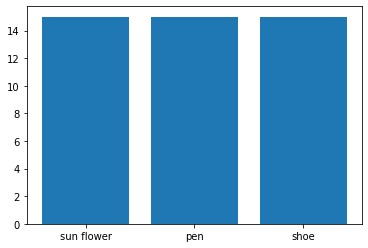

In [ ]:
unique,count = np.unique(target,return_counts=True)
plt.bar(Categories,count)

In [ ]:
# split data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.6,random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'kernel':['rbf']},
              {'C':[1,10,100,1000],'kernel':['poly']}
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['poly']}])

In [ ]:
y_pred = clf.predict(x_test)
y_pred

array([2, 1, 1, 2, 2, 2, 0, 0, 2, 0, 0, 1, 2, 1, 1, 0, 2, 1, 0, 1, 2, 2,
       1, 0, 2, 1, 0])

In [ ]:
y_test

array([2, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0, 2, 1, 0, 1, 2, 2,
       1, 0, 2, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
confusion_matrix(y_pred,y_test)

array([[8, 0, 0],
       [0, 9, 0],
       [1, 0, 9]])

In [ ]:
accuracy_score(y_pred,y_test)

0.9629629629629629

In [ ]:
import pickle                                                      s# saving the model using pickle library
pickle.dump(clf,open('img_model.p','wb'))

In [ ]:
model = pickle.load(open('img_model.p','rb'))

enter your url : https://upload.wikimedia.org/wikipedia/commons/4/4e/Ball-pen.jpg
(267, 400, 3)
PREDICTED OUTPUT: pen


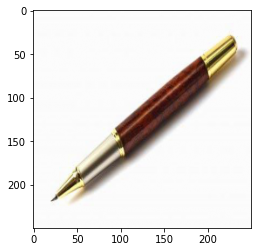

In [ ]:
flat_data = []
url = input('enter your url : ')
img = imread(url)
img_resized = resize(img,(250,250,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = Categories[y_out[0]]
print(f'PREDICTED OUTPUT: {y_out}')